57°
(334, 510, 15859.5)
39°
(110, 89, 16095.0)


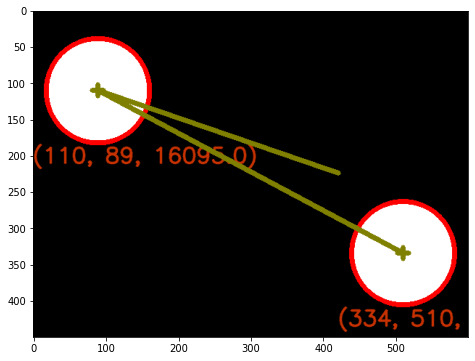

In [102]:
%matplotlib inline
import cv2
from math import atan2, degrees 
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('circulos.PNG')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


# Definição dos valores minimo e max da mascara
# o magenta tem h=300 mais ou menos ou 150 para a OpenCV

image_lower_hsv = np.array([0, 90, 100])  
image_upper_hsv = np.array([10, 255, 255])

mask_hsv1 = cv2.inRange(img_hsv, image_lower_hsv, image_upper_hsv)

image_lower_hsv2 = np.array([70, 1, 0])  
image_upper_hsv2 = np.array([100, 200, 250])

mask_hsv2 = cv2.inRange(img_hsv, image_lower_hsv2, image_upper_hsv2)

mask_final = cv2.bitwise_or(mask_hsv1, mask_hsv2)

contornos, _ = cv2.findContours(mask_final, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

mask_rgb = cv2.cvtColor(mask_final, cv2.COLOR_GRAY2RGB) 
contornos_img = mask_rgb.copy() # Cópia da máscara para ser desenhada "por cima"

for c in contornos:
  area = cv2.contourArea(c)

  M = cv2.moments(c)

  cx = int(M['m10']/M['m00'])
  cy = int(M['m01']/M['m00'])

  cv2.drawContours(contornos_img, contornos, -1, [255, 0, 0], 5);
  
  size = 8
  color = (128,128,0)
  cv2.line(contornos_img,(cx - size,cy),(cx + size,cy),color,5)
  cv2.line(contornos_img,(cx,cy - size),(cx, cy + size),color,5)

  
  font = cv2.FONT_HERSHEY_SIMPLEX
  text = cy , cx, area
  if area > cx:
    origem = (cx - 90, cy + 100)
  else: 
    origem = (cx - 240, cy + 100)

  cv2.putText(contornos_img, str(text), origem, font,1,(200,50,0),2,cv2.LINE_AA)

  print(str(round(degrees(atan2(cx,cy)))) + '°')

  print(text)

cv2.line(contornos_img,(510, 334),(89, 110),color,5)

cv2.line(contornos_img,(421, 224),(89, 110),color,5)



plt.figure(figsize=(8,6))
plt.imshow(contornos_img);